In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

(x_train, y_train),(x_test, y_test) = keras.datasets.cifar10.load_data()

# how many claasses
NUM_CLASSES = 10

# Normalizing
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Make labels to one hot
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

2024-11-05 10:00:44.847576: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730768444.867749   14179 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730768444.873412   14179 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-05 10:00:44.893486: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Sequencial and functionoal

In [2]:
# Make layers for MLP (분류를 위한 다층 퍼셉트론)

# Sequential Model:
# 첫 번째 방법은 Sequential 모델을 사용하여 MLP를 정의하는 것입니다.
# Sequential 모델은 레이어를 순차적으로 쌓아서 모델을 생성하는 간단한 방법입니다.
# 이 방법은 모델의 입력부터 출력까지 레이어를 순서대로 나열하여 모델을 정의합니다.
# 이 방법은 간단하고 명확하며, 모델의 구조가 순차적인 경우에 적합합니다.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(200, activation= 'relu'),
    keras.layers.Dense(150, activation= 'relu'),
    keras.layers.Dense(10, activation= 'softmax'),
])

model.summary()

# Functional API Model:
# 두 번째 방법은 Functional API를 사용하여 MLP를 정의하는 것입니다.
# Functional API는 보다 유연한 모델 구조를 정의할 수 있도록 해줍니다.
# 이 방법은 입력 레이어와 출력 레이어를 정의하고, 그 사이에 레이어를 연결하는 방식으로 모델을 구성합니다.
# 이 방법은 다양한 레이어 구조와 복잡한 모델 구조를 생성하는 데 유용하며,
# 다중 입력 또는 다중 출력 모델을 만들 수 있습니다.
input_layer = keras.layers.Input(shape=(32,32,3))
x = keras.layers.Flatten()(input_layer)
x = keras.layers.Dense(units=200, activation = 'relu')(x)
x = keras.layers.Dense(units=150, activation = 'relu')(x)
output_layer = keras.layers.Dense(units=10, activation = 'softmax')(x)
model = keras.models.Model(input_layer, output_layer)

model.summary()

/home/tommy/anaconda3/envs/p3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1730768449.609802   14179 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9711 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:07:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       614,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 200)            │       614,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

## 손실함수 및 옵티마이저

In [3]:
# 모델 준비(컴파일)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
model.fit(x_train, y_train,
          batch_size=4,
          epochs=10,
          shuffle=True)

Epoch 1/10


2024-11-05 10:00:51.355085: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.
2024-11-05 10:00:51.850697: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.
I0000 00:00:1730768452.737929   14368 service.cc:148] XLA service 0x7fe4d0004100 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730768452.737976   14368 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-11-05 10:00:52.763346: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1730768452.872530   14368 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-11-05 10:00:54.276050: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are

   52/12500 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.0913 - loss: 2.8666 

I0000 00:00:1730768455.855391   14368 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


12500/12500 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.2330 - loss: 2.0499
Epoch 2/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.3099 - loss: 1.8742
Epoch 3/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.3184 - loss: 1.8474
Epoch 4/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.3254 - loss: 1.8295
Epoch 5/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.3247 - loss: 1.8209
Epoch 6/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.3343 - loss: 1.8048
Epoch 7/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.3370 - loss: 1.7991
Epoch 8/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.3452 - loss: 1.7820
Epoch 9/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.3504 - loss: 1.7696
Epoch 10/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.3559 - loss: 1.7630


2024-11-05 10:04:43.333009: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_48', 144 bytes spill stores, 144 bytes spill loads



311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3611 - loss: 1.7402

2024-11-05 10:04:46.283863: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_48', 12 bytes spill stores, 12 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.3610 - loss: 1.7402
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


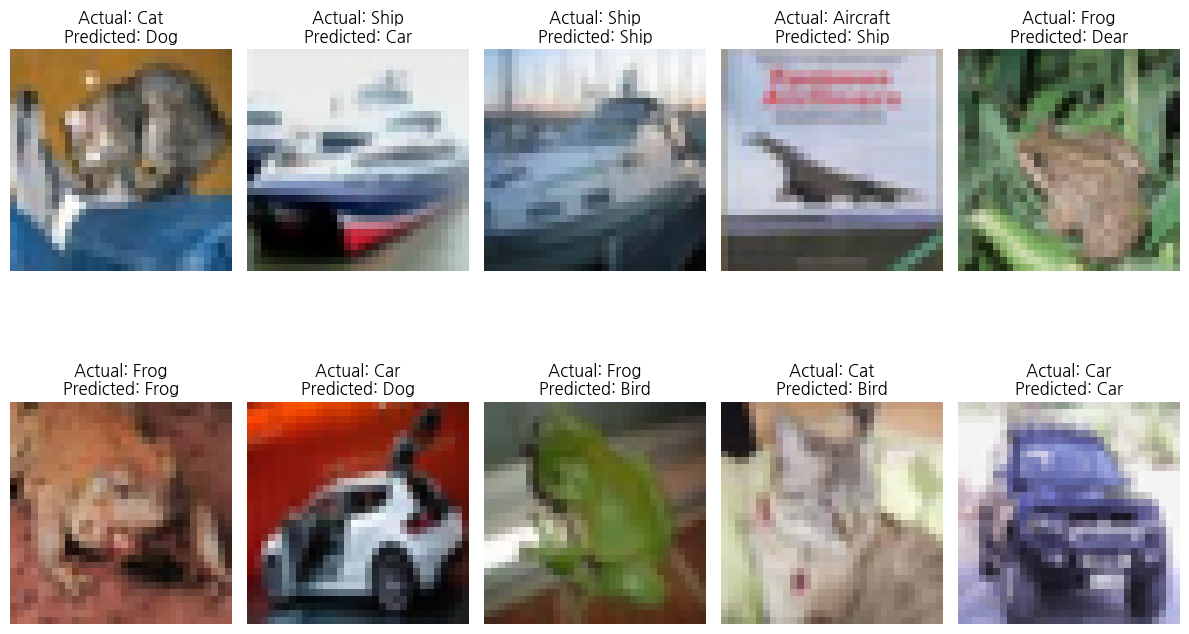

In [5]:
# 모델 평가하기
model.evaluate(x_test,y_test)

classes=np.array(['Aircraft','Car','Bird','Cat','Dear','Dog','Frog','Horse','Ship','Truck'])
preds = model.predict(x_test)

preds_single = classes[np.argmax(preds, axis=-1)]
actual_single = classes[np.argmax(y_test,axis=-1)]

import matplotlib.pyplot as plt

# 몇 개의 예측 결과를 시각화할 것인지 설정
n_t_show = 10

# 테스트 데이터와 예측 결과 가져오기
x_samples = x_test[:n_t_show]
predicted_classes = preds_single[:n_t_show]
actual_classes = actual_single[:n_t_show]

# 예측 결과 시각화
plt.figure(figsize=(12, 8))
for i in range(n_t_show):
    plt.subplot(2, n_t_show // 2, i + 1)
    plt.imshow(x_samples[i])
    plt.title(f'Actual: {actual_classes[i]}\nPredicted: {predicted_classes[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()
